#Desarrollo

1.   **Usar el criterio de la Silueta para verificar que hay un máximo local cerca de k=8 clusters.** Aplicar el algoritmo kmeans con k=8 clusters sobre los datos de *sprites* (matriz *data*).

In [ ]:
from google.colab import drive
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA                 #para reducir la dimension
from sklearn.cluster import KMeans                    # K-means
from sklearn.metrics import silhouette_score          #coeficiente silueta


drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#Dataframe con las estadisticas de cada pokemon
filename = '/content/drive/My Drive/LaboDatos2022/TerceraEjercitacion/pokemon_dataframe.csv'
df = pd.read_csv(filename).copy()
df.head()

,Unnamed: 0,level_0,index,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,0,0,0,1,bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,1,1,1,2,ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,2,2,2,3,venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,3,4,4,charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,4,4,5,5,charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False


In [ ]:
#Dataframe con las imagenes de cada pokemon (hay la misma cantidad y tienen los mismos nombres que en df anterior)

filename = '/content/drive/My Drive/LaboDatos2022/TerceraEjercitacion/pokemon_imagenes.p'

file = open(filename, 'rb')
data = pickle.load(file)      #Tiene las fotos, donde la i-esima imagen, corresponde al i-esimo nombre
file.close()

nombres= data['nombres']
imagenes = data['imagenes']   #shape de cada imagen es de (56, 68)

In [ ]:
#antes de usar el criterio que pide el enunciado. Primero reshapeo las imagenes de ser una matriz de 56*68 a un vector de 3808 valores
data = np.zeros((len(nombres),56*68))

for n,img in enumerate(imagenes):
  img.resize(56*68)
  data[n,:] = img

data.shape

(698, 3808)

Ahora uso el criterio silueta:

In [ ]:
siluetaCoef = [] # Es una lista que guarda los coeficientes de silhouette para cada valor de k

# Necesito al menos 2 clusters y a los sumo N-1 (con N el numero de muestras) para obtener el coeficiente de Silohuette
for k in range(2, 20):
     kkkmeans = KMeans(n_clusters=k)
     kkkmeans.fit(data)
     score = silhouette_score(data, kkkmeans.labels_)
     siluetaCoef.append(score)

Text(0, 0.5, 'Promedio coeficientes de Silhouette')

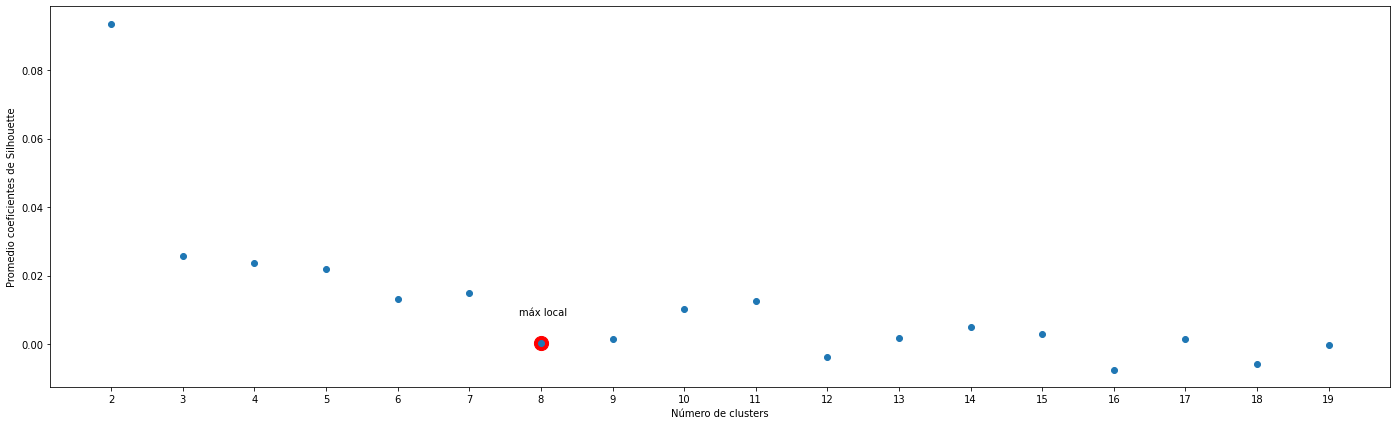

In [ ]:
fig, ax = plt.subplots(figsize = (24, 7))

ax.scatter(8, siluetaCoef[6], color='red', s=200) # agrego un punto rojo al plot de tamaño s=200 en el lugar donde se encuentra el codo
ax.text(7.7, siluetaCoef[7]+0.007, s="máx local")

# estas lineas son el grafico de SSE vs K
ax.scatter(range(2, 20), siluetaCoef)
ax.set_xticks(range(2, 20))
ax.set_xlabel("Número de clusters")
ax.set_ylabel("Promedio coeficientes de Silhouette")

**Aplicar el algoritmo kmeans con k=8 clusters sobre los datos de sprites (matriz data).**

In [ ]:
pca = PCA(n_components = 100)                   #Creo el modelo PCA con 100 componentes

pca.fit(data)                                   #Ajusto
X_pca = pca.transform(data)                     #y transformo los datos

X_pca.shape                                     #Hay 698 pokemonsFotoVector y 100 Componentes Principales (PCs)

(698, 100)

In [ ]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(X_pca)                               #Aplico el algoritmo de kmeans con k=8

KMeans()

In [ ]:
np.unique(kmeans.labels_, return_counts=True)   #1er array me dice como se llama cada label de cluser y 2do array me dice cuantos pokemons tiene cada cluster
labels = kmeans.labels_                         #el i-esimo label, es el cluster del i-esimo
labels = labels + 1                             #para que queden clusters del 1 al 8


2. Visualizar las primeras dos componentes de la matriz de sprites, pintando con un color distinto los datos que pertenezcan a cada cluster, e indicando con cruces la posición de los centroides (ayuda: el código para hacer esto se encuentra en el notebook de clustering que vimos en clase).

In [ ]:
centroids = kmeans.cluster_centers_ #Obtengo las posiciones de los centroides
print("El .shape de los centroides: ")
print(centroids.shape)

El .shape de los centroides: 
(8, 100)


Text(0, 0.5, 'Segunda componente principal')

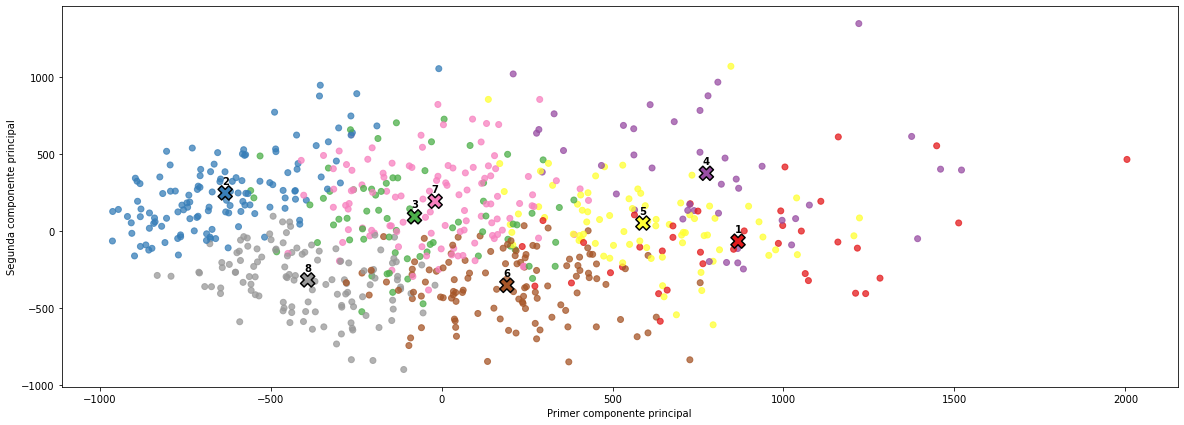

In [ ]:
fig, ax = plt.subplots(figsize = (20, 7))

# Hago scatter de cada uno de los datos
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_,  cmap='Set1', alpha = 0.75)
# y de los centroides
ax.scatter(centroids[:, 0], centroids[:, 1], marker="X", s=200, linewidths=1.5, c=np.unique(kmeans.labels_),  cmap='Set1', edgecolors='black')

# Por cada centroide escribimos a qué número corresponde
for i in range(centroids.shape[0]):
 ax.text(centroids[i, 0] - 10, centroids[i, 1]+ 60, s = i+1, weight='bold')

ax.set_xlabel('Primer componente principal')
ax.set_ylabel('Segunda componente principal')

3. Visualizar los primeros 10 elementos de cada cluster.

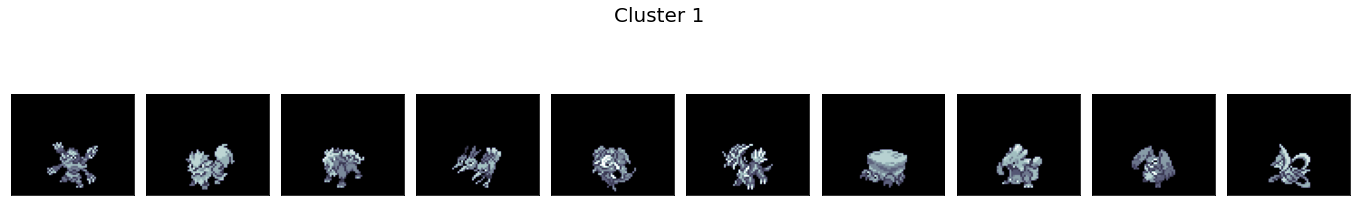

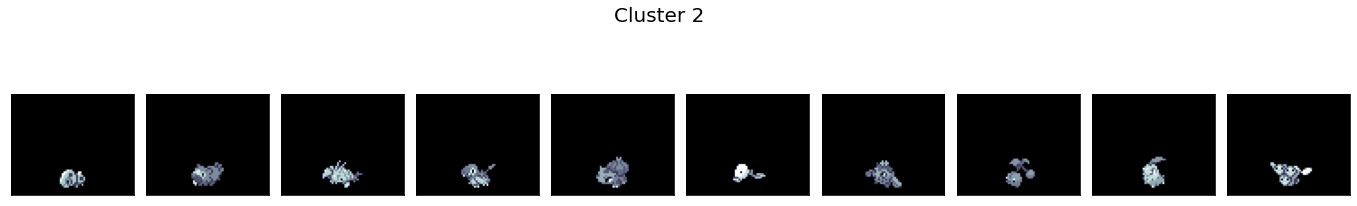

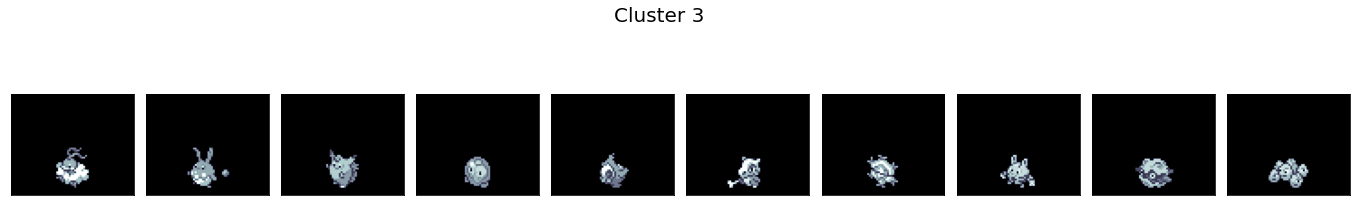

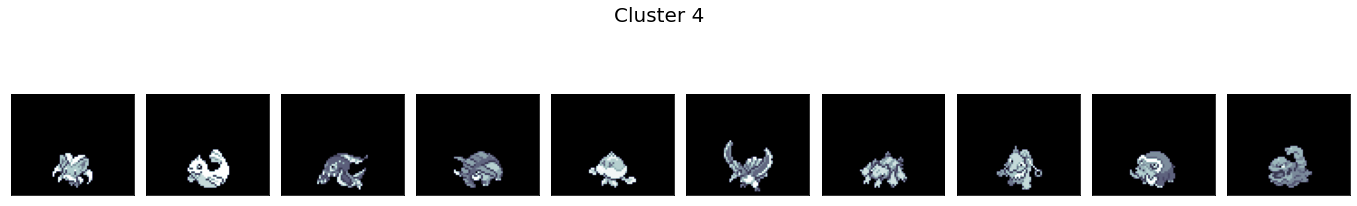

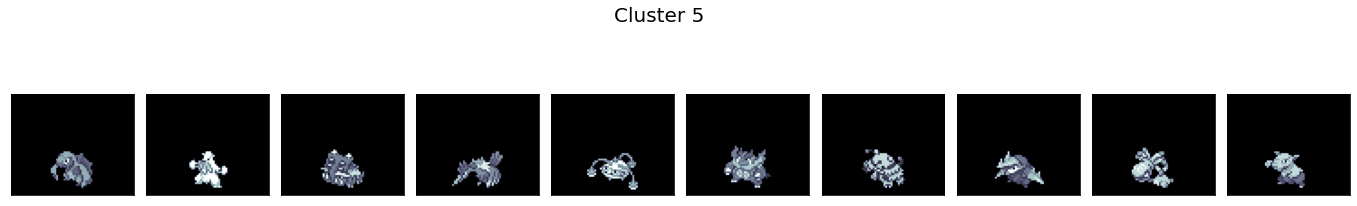

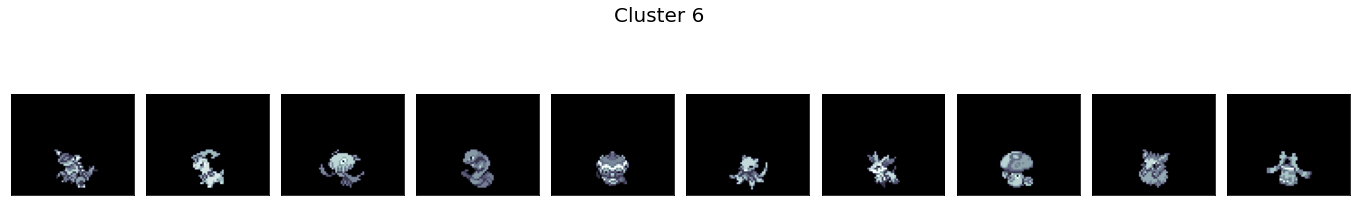

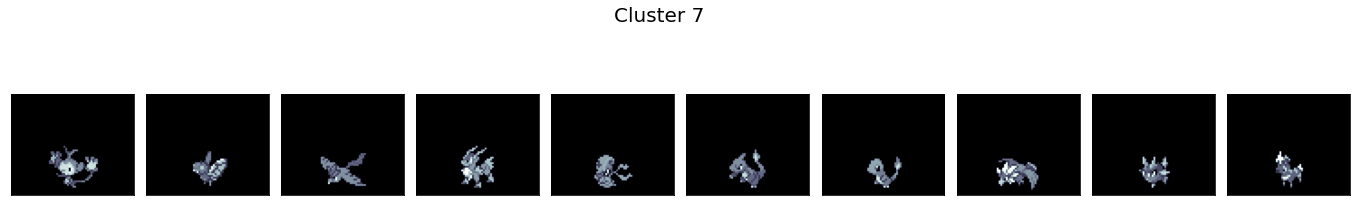

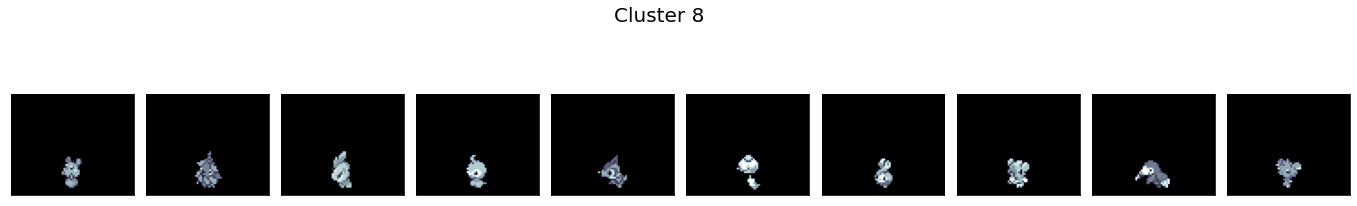

In [ ]:
#Hago un for por cada cluster, hay 8 en total
for i in np.arange(1,9):
    index = np.nonzero(labels==i)[0]                                    # los índices correspondientes a la i-ésima etiqueta
    num = 10                                                            # el número de samples en cada cluster
    thisPokemons = data[index].reshape(len(index),56, 68)               # reshape de los samples del i-ésimo cluster para que tenga el formato de una imagen de (56, 68) pixeles
    fig, axes = plt.subplots(1, num, figsize=(24, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    fig.suptitle("Cluster " + str(i), fontsize=20)
    for i, ax in enumerate(axes.flat):
        ax.imshow(thisPokemons[i], cmap='bone')

4.   En un mismo gráfico de barras, mostrar el valor promedio de los atributos *HP*, *Attack*, *Defense* y *Speed* de cada cluster. ¿Cuál es el cluster de Pokémones más fuertes?

In [ ]:
#Hago merge del df de las estadisticas de los pokemons con los otros datos que obtuve del otro df que me indicaba nombre, imagen y agrego No. de cluster
temp = {'Name':nombres, 'Imagen': imagenes, 'Cluster': list(labels)}
dfImg = pd.DataFrame(temp)

dfBoth = df.merge(dfImg, how = 'inner', on = 'Name')
print(dfBoth.shape[0])
dfBoth.head()

698


,Unnamed: 0,level_0,index,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Imagen,Cluster
0,0,0,0,1,bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2
1,1,1,1,2,ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3
2,2,2,2,3,venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4
3,3,3,4,4,charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",7
4,4,4,5,5,charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",7


In [ ]:
#listas que tendran un numero por cada promedio que corresponde al i-esimo cluster
HPClusters = []
AttackClusters = []
DefenseClusters = []
SpeedClusters = []

for i in np.arange(1,9):
  #para cada cluster hago una lista temporal que tendrá todos los stats de cada pokemon que pertenece a dicho cluster
  tempHP = []
  tempAttack = []
  tempDefense = []
  tempSpeed = []

  #aca agrego cada stat a la lista temporal
  for j in list(dfBoth[dfBoth['Cluster'] == i].index):
    tempHP.append(dfBoth['HP'].iloc[j])
    tempAttack.append(dfBoth['Attack'].iloc[j])
    tempDefense.append(dfBoth['Defense'].iloc[j])
    tempSpeed.append(dfBoth['Speed'].iloc[j])

  #y luego calculo el promedio de esa lista temporal y la agrego a las listas inicializadas arriba de todo
  HPClusters.append(np.mean(tempHP))
  AttackClusters.append(np.mean(tempAttack))
  DefenseClusters.append(np.mean(tempDefense))
  SpeedClusters.append(np.mean(tempSpeed))


In [ ]:
#Promedios de cada cluster
print(HPClusters)
print(AttackClusters)
print(DefenseClusters)
print(SpeedClusters)

[81.36842105263158, 52.016, 69.24285714285715, 93.79069767441861, 84.16666666666667, 72.48672566371681, 66.71171171171171, 58.63333333333333]
[95.02631578947368, 53.48, 64.1, 84.88372093023256, 100.96153846153847, 82.28318584070796, 79.77477477477477, 64.625]
[94.5, 55.232, 68.4, 80.62790697674419, 92.23076923076923, 76.69911504424779, 67.48648648648648, 60.24166666666667]
[81.34210526315789, 54.232, 56.92857142857143, 69.76744186046511, 75.78205128205128, 64.79646017699115, 78.45045045045045, 55.791666666666664]


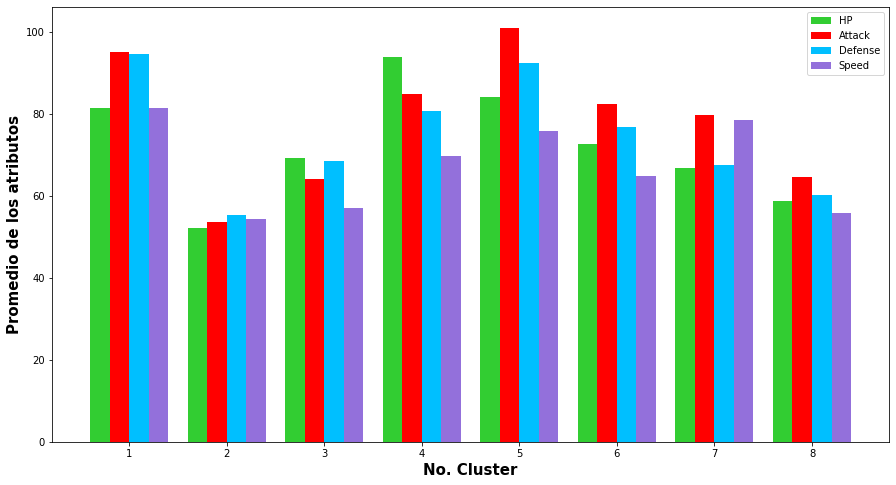

In [ ]:
barWidth = 0.20
fig = plt.subplots(figsize =(15, 8))

# Ubico las barras en el eje X
br1 = np.arange(len(HPClusters))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

# hago el plot
plt.bar(br1, HPClusters, color ='limegreen', width = barWidth, label ='HP')
plt.bar(br2, AttackClusters, color ='r', width = barWidth, label ='Attack')
plt.bar(br3, DefenseClusters, color ='deepskyblue', width = barWidth, label ='Defense')
plt.bar(br4, SpeedClusters, color ='mediumpurple', width = barWidth, label ='Speed')

# agrego nombres y estilo
plt.xlabel('No. Cluster', fontweight ='bold', fontsize = 15)
plt.ylabel('Promedio de los atributos', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth*(3/2) for r in range(len(HPClusters))], np.arange(1,9))

plt.legend()
plt.show()

5.   **Hacer lo mismo que en el ítem anterior, pero con el tamaño promedio de los Pokémones por cluster** (el tamaño se define como la cantidad de entradas no vacías en la fila correspondiente al *sprite* de ese Pokémon en la matriz data). ¿Son los Pokémones más grandes los más fuertes?

In [ ]:
def calculaHeight(a): #funcion para calcular el tamaño
    height = -1
    i = 0
    while(height == -1 and i < a.size):
        if(a[i] != 0):
            height = i
        i += 1

    return height


a = dfBoth['Imagen'].copy()

for i in list(a.index):
  a.iloc[i] = calculaHeight(a.iloc[i])

dfBoth['Height'] = a #le agrego una columna de tamaño a mi df con todos los datos
a.head() #tamaño de los primeros 5 pokemons

0    2416
1    2346
2    2072
3    2421
4    2146
Name: Imagen, dtype: object

In [ ]:
HeightClusters = []

for i in np.arange(1,9): #misma idea de ultimo codigo que hice para hacer el promedio
  tempHeight = [] #hago variable temporal

  for j in list(dfBoth[dfBoth['Cluster'] == i].index):
    tempHeight.append(dfBoth['Height'].iloc[j]) #agrego a esa temporal todos los tamaños de los pokemon que pertenencen a ese cluster

  HeightClusters.append(np.mean(tempHeight)) #calculo promedio y lo agrego a lista de arriba que tendra sólo los promedios


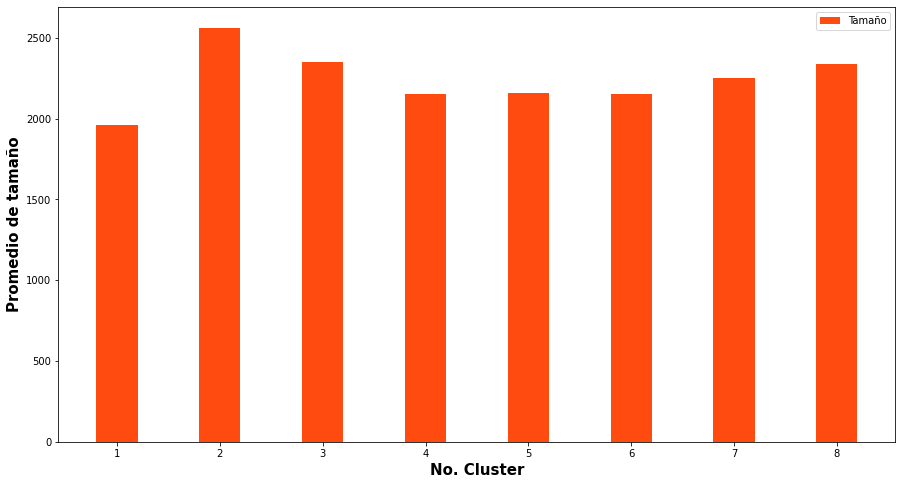

In [ ]:
#hago gráfica
barWidth = 0.40
fig = plt.subplots(figsize =(15, 8))

br1 = np.arange(len(HeightClusters))

plt.bar(br1, HeightClusters, color = '#FF4B0F', width = barWidth, label ='Tamaño')

plt.xlabel('No. Cluster', fontweight ='bold', fontsize = 15)
plt.ylabel('Promedio de tamaño', fontweight ='bold', fontsize = 15)
plt.xticks([r for r in range(len(HPClusters))], np.arange(1,9))

plt.legend()
plt.show()

Respuesta a la pregunta del enunciado: No, sucede todo lo contrario. El promedio de los atributos más alto lo tiene el cluster 3, y es el mismo cluster con los tamaños más bajos.

Se puede afirmar que de estos pokemons que por lo general entre más grande en tamaño, más débil será.

6.   **Hacer gráficos de torta con la proporción de Pokémones legendarios/no legendarios por cluster.** ¿Tiene el cluster de Pokémones más fuertes más legendarios que los otros?

In [ ]:
ratioLegendarios = []

for i in np.arange(1,9): #Veo dentro de cada cluster si el pokemon es legendario o no
  #y llevo la cuena en esta variable temporal
  ratioTemp = [0,0] #1era pos es [#deLegendarios, #deNOlegendarios]

  for j in list(dfBoth[dfBoth['Cluster'] == i].index):
    if(dfBoth['Legendary'].iloc[j]):
        ratioTemp[0] += 1
    else:
        ratioTemp[1] += 1

  ratioLegendarios.append(ratioTemp) #Que termino agregando a una lista de listas que creé al inicio de este código

ratioLegendarios #y queda de ésta forma

[[9, 29], [1, 124], [1, 69], [2, 41], [11, 67], [7, 106], [7, 104], [0, 120]]

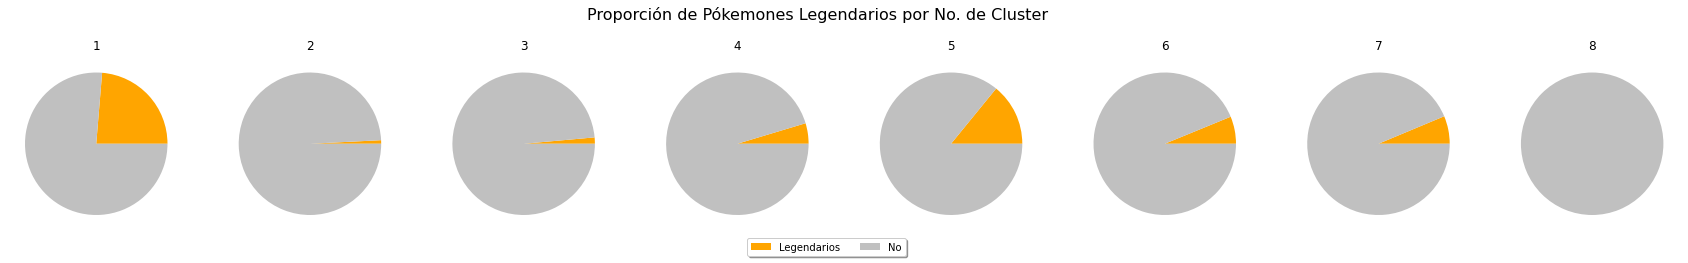

In [ ]:
#Hago grafica pedida
mylabels = ["Legendarios", "No"]
colors=['orange', 'silver']

fig, axes = plt.subplots(1, 8, figsize =(30, 4))
fig.suptitle('Proporción de Pókemones Legendarios por No. de Cluster', fontsize=16)

for i in range(axes.size):
  axes[i].pie(ratioLegendarios[i], labels = mylabels, labeldistance = None, colors=colors)
  axes[i].set_title(i+1)

plt.legend(loc='upper center', bbox_to_anchor=(-3.8, 0), ncol = 2, fancybox=True, shadow=True)

**¿Tiene el cluster de Pokémones más fuertes más legendarios que los otros?:** Si, el cluster 3 es el que tiene la mayor cantidad de pokemones legendarios en total (en comparacion al resto de los clusters) y es el mismo cluster con los pokemones más fuertes (con mayor promedio de atributos) en la gráfica del item 4